In [1]:
import pickle
from statsmodels.iolib.summary2 import summary_col

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pyobjclipboard

In [2]:
class Model_Output:
    def __init__(self, model):
        '''
        Store data from model run.
        '''
        self.agent_vars = model.datacollector.get_agent_vars_dataframe()
        self.model_vars = model.datacollector.get_model_vars_dataframe()
        self.log = model.log

# Pretty-formatting Linear Models

In [44]:
models = []
for i in [1, 2, 3, 4]:
    filename = "transfer/lm_ex_{}.pickle".format(i)
    with open(filename, "rb") as f:
        models.append(pickle.load(f))

In [45]:
linear_models = summary_col(models, float_format="%.3f", stars=True, 
                           model_names=["Experiment {}".format(i) for i in [1, 2, 3, 4]])

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

In [46]:
print(linear_models)


                    Experiment 1 Experiment 2 Experiment 3 Experiment 4
-----------------------------------------------------------------------
Const.              1.043***     1.014***     0.392***     0.362***    
                    (0.183)      (0.173)      (0.049)      (0.044)     
Predicted_Conflicts 1.473        8.327***     17.409***    1015.746*** 
                    (1.235)      (1.950)      (5.090)      (40.768)    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [47]:
print(linear_models.as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lcccc}
\hline
                    & Experiment 1 & Experiment 2 & Experiment 3 & Experiment 4  \\
\hline
\hline
\end{tabular}
\begin{tabular}{lllll}
Const.              & 1.043***     & 1.014***     & 0.392***     & 0.362***      \\
                    & (0.183)      & (0.173)      & (0.049)      & (0.044)       \\
Predicted_Conflicts & 1.473        & 8.327***     & 17.409***    & 1015.746***   \\
                    & (1.235)      & (1.950)      & (5.090)      & (40.768)      \\
\hline
\end{tabular}
\end{center}
\end{table}


# Pretty-Format Logit Models

In [50]:
models = []
for i in [1, 2, 3, 4]:
    filename = "transfer/logit_ex_{}.pickle".format(i)
    with open(filename, "rb") as f:
        models.append(pickle.load(f))

logit_models = summary_col(models, float_format="%.3f", stars=True, 
                           model_names=["Experiment {}".format(i) for i in [1, 2, 3, 4]])
print(logit_models)

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind


                    Experiment 1 Experiment 2 Experiment 3 Experiment 4
-----------------------------------------------------------------------
Const.              -1.300***    -1.422***    -2.201***    -2.197***   
                    (0.101)      (0.111)      (0.067)      (0.066)     
Predicted_Conflicts 1.952***     27.658***    19.739***    654.501***  
                    (0.622)      (7.190)      (4.556)      (148.758)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [51]:
print(logit_models.as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lcccc}
\hline
                    & Experiment 1 & Experiment 2 & Experiment 3 & Experiment 4  \\
\hline
\hline
\end{tabular}
\begin{tabular}{lllll}
Const.              & -1.300***    & -1.422***    & -2.201***    & -2.197***     \\
                    & (0.101)      & (0.111)      & (0.067)      & (0.066)       \\
Predicted_Conflicts & 1.952***     & 27.658***    & 19.739***    & 654.501***    \\
                    & (0.622)      & (7.190)      & (4.556)      & (148.758)     \\
\hline
\end{tabular}
\end{center}
\end{table}


# Pretty-Formal MNLogit

In [3]:
models = []
for i in [1, 2]:
    filename = "transfer/mn_ex_{}.pickle".format(i)
    with open(filename, "rb") as f:
        models.append(pickle.load(f))

In [70]:
with open("transfer/mn2_out.csv", "w") as f:
    csv_out = models[1].summary().tables[1].as_csv() 
    f.write(csv_out)

# Pretty-Formatted Graphs

In [3]:
params = {
    "font.family": 'serif',
    "font.serif": ["Computer Modern"],
    'text.usetex': True,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.labelsize': 14

   }
plt.rcParams.update(params)

## COW data correlation plot

In [3]:
us_position, soviet_positions = pyobjclipboard.paste_object()

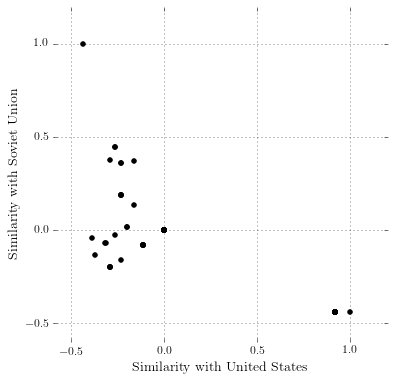

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(us_position, soviet_positions, color='k')
ax.set_xlabel("Similarity with United States")
ax.set_ylabel("Similarity with Soviet Union")
ax.grid(True)
for spine in ["top", "left", "right", "bottom"]:
    ax.spines[spine].set_visible(False)


In [9]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/ColdWar/Figures/"
fig.savefig(PATH + "us_sov_similarities.pdf")

### CDFs

In [ ]:
base, cdf_1 = pyobjclipboard.paste_object()
cdf_1 = cdf_1 / cdf_1.max()

In [ ]:
base_2, cdf_2 = pyobjclipboard.paste_object()
cdf_2 = cdf_2 / cdf_2.max()

In [ ]:
base_3, cdf_3 = pyobjclipboard.paste_object()
cdf_3 = cdf_3 / cdf_3.max()

In [ ]:
base_4, cdf_4 = pyobjclipboard.paste_object()
cdf_4 = cdf_4 / cdf_4.max()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
p1, = ax.plot(base[:-1], cdf_1, color='k', lw=2)
p2, = ax.plot(base[:-1], cdf_2, color='k', lw=2, ls="--")
p3, = ax.plot(base[:-1], cdf_3, color='k', lw=2, ls="-.")
p4, = ax.plot(base[:-1], cdf_4, color='k', lw=2, ls=":")
ax.grid(True)
ax.set_xlabel("Final median position")
ax.set_ylabel("Cumulative probability")
for spine in ["top", "left", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

handlers = [p1, p2, p3, p4]
labels = ["Experiment {}".format(i) for i in [1, 2, 3, 4]]
ax.legend(handlers, labels, loc=4)

In [ ]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/ColdWar/Figures/"
fig.savefig(PATH + "Model_cdfs.pdf")

## All run traces

In [41]:
model_runs = []
filename = "data_output/ColdWar_Experiment2_1.pickle"
with open(filename, "rb") as f:
    model_runs += pickle.load(f)

all_dfs = []
for i, model in enumerate(model_runs):
    df = model.model_vars.copy()
    df.reset_index(inplace=True)
    df.rename(columns={"index": "Step"}, inplace=True)
    df["Iteration"] = i
    all_dfs.append(df)
results = pd.concat(all_dfs)

KeyboardInterrupt: 

In [ ]:
# Plot all runs
fig, ax = plt.subplots(figsize=(10, 4))
for i, group in results.groupby("Iteration"):
    group.plot(x="Step", y="Median", color='k', alpha=0.05, ax=ax, legend=False)

ax.set_ylim(0, 1.05)
ax.set_ylabel("Median position")

ax.grid(True)
for spine in ["top", "left", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

In [ ]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/ColdWar/Figures/"
fig.savefig(PATH + "Exp3_traces.pdf")

## Sample run traces

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
#i = 832 # Experiment 1
#i = 954 # Experiment 2
i = 463 # Experiment 3
#i = 127 # Experiment 4
subset = results[results.Iteration==i]
p1 = subset.plot(x="Step", y="Median", color='k', lw=2, ls='-', ax=ax, legend=False)
p2 = subset.plot(x="Step", y="Mean", color='k', lw=2, ls='--', ax=ax, legend=False)

ax.set_ylim(0, 1.05)
ax.set_xlabel("Step")
ax.set_ylabel("Position")
ax.grid(True)
for spine in ["top", "left", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.legend( loc=4)

In [ ]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/ColdWar/Figures/"
fig.savefig(PATH + "Exp3_uswin_trace.pdf")

### All Agent Traces

In [18]:
# Get agent-level data
#agent_data = pd.read_csv("BDM_ColdWar.csv")
agent_data = pd.read_csv("ColdWarActors_1948.csv")
agent_data.set_index("Country", inplace=True)

In [19]:
agent_data.head()

,Unnamed: 0,Capability,Position
Country,,,
United States of America,0,0.294660,1.000000e+00
Russia,1,0.164000,-3.439353e-16
China,2,0.115055,5.724034e-01
United Kingdom,3,0.075426,5.368582e-01
India,4,0.052450,5.632982e-01


In [23]:
model_runs = []
filename = "data_output/ColdWar_Experiment4_2.pickle"
with open(filename, "rb") as f:
    model_runs += pickle.load(f)

#i = 832 # Experiment 1
#i = 954 # Experiment 2
#i = 463 # Experiment 3
i = 127 # Experiment 4
m = model_runs[i]
agent_positions = m.agent_vars.copy()
agent_positions.reset_index(inplace=True)
median_positions = m.model_vars
median_positions.reset_index(inplace=True)
median_positions.rename(columns={"index": "Step"}, inplace=True)#

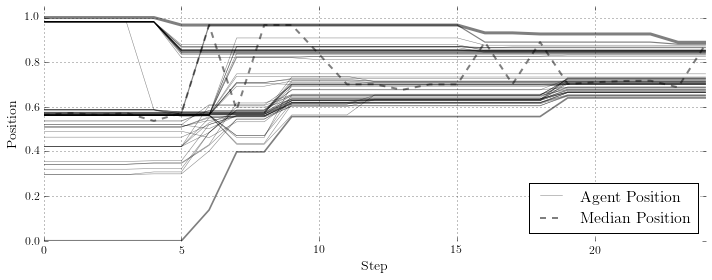

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))

for i, group in agent_positions.groupby("AgentID"):
    c = (agent_data.Capability[i] / agent_data.Capability.max()) * 3
    c = max(c, 0.5)
    group.plot(x="Step", y="Position", lw=c, c='k', alpha=0.5, ax=ax, legend=False)
ax.set_ylim(0, 1.05)

median_positions.plot(x="Step", y="Median", c='k', ls='--', 
                      lw=2, alpha=0.5, ax=ax, legend=False)

ax.set_ylabel("Position")
ax.grid(True)
for spine in ["top", "left", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[-2:], ["Agent Position", "Median Position"], loc=4, fontsize=16)
fig.tight_layout()

In [25]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/ColdWar/Figures/"
fig.savefig(PATH + "Exp4_agent_traces.pdf")

# Input Tables

## Baseline inputs

In [25]:
table = pd.read_csv("BDM_ColdWar.csv")

In [5]:
table.head()

,Country,Capability,Position
0,Argentina,0.972,89.6
1,Australia,0.889,1.3
2,Belgium,1.182,2.8
3,Brazil,0.993,89.6
4,Bulgaria,0.345,-100.0


In [6]:
print(table.to_latex(index=False))

\begin{tabular}{lrr}
\toprule
        Country &  Capability &  Position \\
\midrule
      Argentina &       0.972 &      89.6 \\
      Australia &       0.889 &       1.3 \\
        Belgium &       1.182 &       2.8 \\
         Brazil &       0.993 &      89.6 \\
       Bulgaria &       0.345 &    -100.0 \\
         Canada &       1.610 &      56.2 \\
          China &      11.941 &       1.3 \\
 Czechoslovakia &       1.401 &     -91.0 \\
        Denmark &       0.240 &       1.3 \\
          Egypt &       0.408 &       3.2 \\
        England &       7.863 &       3.6 \\
         France &       3.597 &       2.8 \\
         Greece &       0.418 &       1.3 \\
        Hungary &       0.450 &     -91.0 \\
          India &       2.468 &       1.3 \\
           Iran &       0.491 &       2.4 \\
           Iraq &       0.157 &       3.7 \\
         Israel &       0.125 &       1.3 \\
          Italy &       2.426 &       1.3 \\
         Mexico &       0.774 &      89.6 \\
         Norway 

In [26]:
# Rescale
table.Position = (table.Position + 100) / (200)

In [12]:
table.head()

,Country,Capability,Position
0,Argentina,0.972,0.9480
1,Australia,0.889,0.5065
2,Belgium,1.182,0.5140
3,Brazil,0.993,0.9480
4,Bulgaria,0.345,0.0000


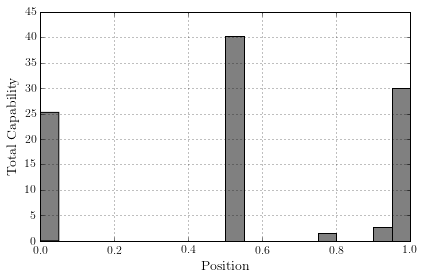

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))

table.Position.hist(ax=ax, color='grey', bins = np.linspace(0,1,21),
                    weights=table.Capability)
ax.set_xlabel("Position")
ax.set_ylabel("Total Capability")
fig.tight_layout()

In [29]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/ColdWar/Figures/"
fig.savefig(PATH + "Original_Inputs_hist.pdf")

## Updated inputs

In [30]:
table = pd.read_csv("ColdWarActors_1948.csv")
table = table[["Country", "Capability", "Position"]]

In [31]:
table.Position = table.Position.round(decimals=2)

In [20]:
table.sort("Country", inplace=True)

In [21]:
print(table.to_latex(index=False))

\begin{tabular}{lrr}
\toprule
                  Country &  Capability &  Position \\
\midrule
              Afghanistan &    0.002334 &      0.58 \\
                  Albania &    0.000861 &      0.36 \\
                Argentina &    0.008271 &      0.98 \\
                Australia &    0.008334 &      0.57 \\
                  Belgium &    0.010908 &      0.42 \\
                  Bolivia &    0.000609 &      0.98 \\
                   Brazil &    0.012193 &      0.98 \\
                 Bulgaria &    0.003111 &      0.42 \\
                   Canada &    0.012593 &      0.56 \\
                    Chile &    0.002053 &      0.98 \\
                    China &    0.115055 &      0.57 \\
                 Colombia &    0.002628 &      0.98 \\
               Costa Rica &    0.000089 &      0.98 \\
                     Cuba &    0.001736 &      0.98 \\
           Czechoslovakia &    0.012601 &      0.34 \\
                  Denmark &    0.002057 &      0.56 \\
       Dominican Republic 

In [22]:
with open("transfer/new_actors.csv", "w") as f:
    f.write(table.to_csv())

In [32]:
table.Capability = (100/table.Capability.sum())*table.Capability

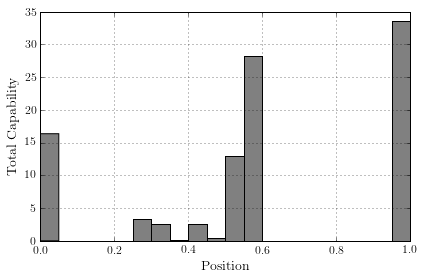

In [34]:
fig, ax = plt.subplots(figsize=(6, 4))

table.Position.hist(ax=ax, color='grey', bins = np.linspace(0,1,21),
                    weights=table.Capability)
ax.set_xlabel("Position")
ax.set_ylabel("Total Capability")
fig.tight_layout()

In [35]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/ColdWar/Figures/"
fig.savefig(PATH + "Updated_Inputs_hist.pdf")